#### Linear Regression
In this **notebook** we are going to implement *Linear Regression* on a small `dataset`.

In [17]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

We are using a small dataset from [here](https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html). This a data about Cricket Chirps Vs. Temperature. We will use linear regression to fit model.

In [18]:
# !pip install xlrd

In [19]:
# loading data
data = pd.read_excel('slr02.xls', engine='xlrd')

*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'


Now we look into data we see there are two columns X and Y. 

were X = chirps/sec for the striped ground cricket

and Y = temperature in degrees Fahrenheit

In [20]:
# visualise data
data

,X,Y
0,20.000000,88.599998
1,16.000000,71.599998
2,19.799999,93.300003
3,18.400000,84.300003
4,17.100000,80.599998
5,15.500000,75.199997
6,14.700000,69.699997
7,17.100000,82.000000
8,15.400000,69.400002
9,16.200001,83.300003


In [21]:
type(data)

pandas.core.frame.DataFrame

In [22]:
# data we got are in pandas dataframe format
# we need to cast it in numpy array for calulations
X = np.array(data.X)
y = np.array(data.Y)

Now we have two arrays. One containing input features and other array has output features

In [23]:
# visualise casted data
X,y

(array([20.        , 16.        , 19.79999924, 18.39999962, 17.10000038,
        15.5       , 14.69999981, 17.10000038, 15.39999962, 16.20000076,
        15.        , 17.20000076, 16.        , 17.        , 14.39999962]),
 array([88.59999847, 71.59999847, 93.30000305, 84.30000305, 80.59999847,
        75.19999695, 69.69999695, 82.        , 69.40000153, 83.30000305,
        79.59999847, 82.59999847, 80.59999847, 83.5       , 76.30000305]))

In [24]:
type(X)

numpy.ndarray

In [25]:
# function for plotting data points
def plot_points(X, y, xlabel, ylabel):
    """Plot points given X and Y co-ordinates and labels them"""
    plt.plot(X, y, 'o')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

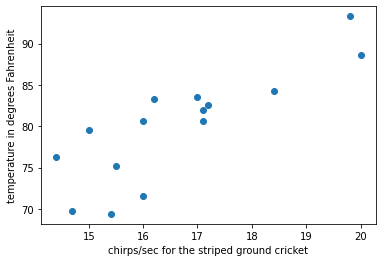

In [26]:
# plot data points
plot_points(X, y, "chirps/sec for the striped ground cricket", "temperature in degrees Fahrenheit")

We have initialised theta to a random value.
We then create hypothesis for model which is linear in nature

In [35]:
# initialised theta
np.random.seed(2)
theta = np.random.rand(2,1)
# hypothesis of model
def hypothesis(X, theta):
    """Predicts output feature given input feature and theta"""
    return theta[0] + theta[1] * X

We want to draw our line of regression to see if fit data correctly.

In [36]:
# plots line of regression
def draw_line(theta):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = hypothesis(x_vals, theta)
    plt.plot(x_vals, y_vals, '--')

We want to plot data points and line of regession on same plot to see if we are progressing as we train our model

In [37]:
# plots points and lines
def draw_points_and_lines(X, y, xlabel, ylabel, theta):
    """Draws lines and points"""
    plot_points(X, y, xlabel, ylabel)
    draw_line(theta)

Now without training our model let's were the line of  regression lies

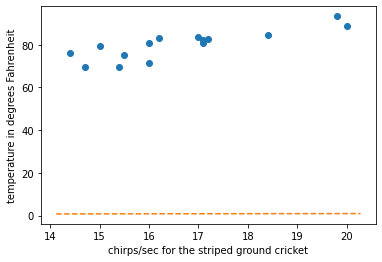

In [38]:
# draw line of regression without traing model
draw_points_and_lines(X, y, "chirps/sec for the striped ground cricket", "temperature in degrees Fahrenheit", theta)

Cost function givies us measure of how much we are error we have

we need to minimize  it. Here we have used sqared error cost function which basically sums over all the sqared error of indivisual points

In [39]:
# cost function
m = len(X)
def cost(X, y, theta):
    """Returns cost"""
    return (1/(2*m)) * np.sum((hypothesis(X, theta) - y) ** 2)

In [40]:
# initial cost without training model
cost(X, y, theta)

3154.8870744571304

Now we will minimize cost with help of **gradient descent**

In [41]:
# minimize cost
def gradient_descent(X, y, theta, alpha, steps):
    for i in range(steps):
        old_cost = cost(X, y, theta)
        temp0 = theta[0] - alpha * ((1/m) * np.sum(hypothesis(X, theta) - y))
        temp1 = theta[1] - alpha * ((1/m) * np.dot((hypothesis(X, theta) - y), X))
        theta[0] = temp0
        theta[1] = temp1
        new_cost = cost(X, y, theta)
        if new_cost > old_cost:
            print("WARNING!!! COST INCREASING", new_cost)
        else:
            print("Cost Decresing", new_cost)

In [42]:
# train model of 100 iterations
gradient_descent(X, y, theta, alpha=0.001, steps=100)
theta

Cost Decresing 1635.2977297675818
Cost Decresing 849.7898307803341
Cost Decresing 443.74415710903946
Cost Decresing 233.85053343835588
Cost Decresing 125.35205308530111
Cost Decresing 69.26686684984337
Cost Decresing 40.275220900407845
Cost Decresing 25.288798961439458
Cost Decresing 17.541973528482107
Cost Decresing 13.537448649531214
Cost Decresing 11.467398078189143
Cost Decresing 10.397318191652165
Cost Decresing 9.84414430227494
Cost Decresing 9.558170056057687
Cost Decresing 9.410316957257288
Cost Decresing 9.33386160137713
Cost Decresing 9.294313249413898
Cost Decresing 9.27384290888777
Cost Decresing 9.26323439649766
Cost Decresing 9.257723672170306
Cost Decresing 9.254848102831042
Cost Decresing 9.253334701358167
Cost Decresing 9.252525433784397
Cost Decresing 9.252080148434466
Cost Decresing 9.251823013713082
Cost Decresing 9.25166313854976
Cost Decresing 9.251553539427785
Cost Decresing 9.251469929573634
Cost Decresing 9.251399754640376
Cost Decresing 9.251336525020578
Cost 

array([[0.74045512],
       [4.74763234]])

After training we can clearly see we have reduced cost and have found appropriate value of theta

In [43]:
# cost after traing model
cost(X, y, theta)

9.247425317816075

In [44]:
# value of theta after training 
theta

array([[0.74045512],
       [4.74763234]])

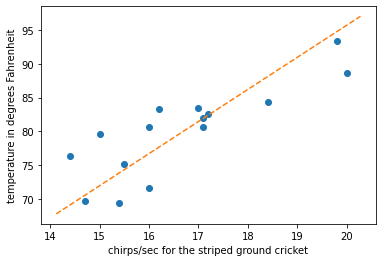

In [45]:
# regression line after traing model
draw_points_and_lines(X, y, "chirps/sec for the striped ground cricket", "temperature in degrees Fahrenheit", theta)

We can clearly see we have fitted line to the points. Thus we have successfully used linear regression to train a model.

### Prediction

In [50]:
x = np.array([14.9])
hypothesis(x, theta)

array([71.48017697])